In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc

In [2]:
plt.rc('font',size=25)

In [3]:
plt.rcParams.update({'figure.figsize': (6, 6),
                   'font.size':25,
                   'text.usetex':True,
                   'mathtext.default' : 'it',
                   'axes.labelsize': 32,
                   'legend.fontsize': 25,
                   'legend.fancybox': False,
                   'legend.numpoints': 1,
                   'xtick.labelsize': 32,
                   'ytick.labelsize': 32,
                   'ytick.major.width':0.8,
                   'ytick.major.size':8,
                   'ytick.minor.size':4,
                   'xtick.major.width': 0.8,
                   'xtick.major.size':8,
                   'xtick.minor.size':4,
                   'axes.linewidth':2,
                   'lines.linewidth':2,
                   'xtick.direction':'in',
                   'ytick.direction':'in',
                   'savefig.bbox': 'tight', # 'tight' or 'standard'.
                   'savefig.pad_inches' : 0.1})
plt.rc('font',**{'family':'serif','serif':['Computer Modern'],'sans-serif':['Computer Modern']})

from matplotlib.ticker import FuncFormatter
#%matplotlib inline

import glob

# after Feb.7

In [4]:
h=pd.read_csv('../Downloads/catalog/final/HSCall_ol.csv')

In [8]:
len(h)

8273848

In [11]:
len(h[h.i_psfflux_mag<23.5])

3800206

In [12]:
len(h[h.i_psfflux_mag<24])

5547382

In [5]:
s=pd.read_csv('../Downloads/catalog/final/S82all_ol.csv')

In [15]:
len(s[s.psfMag_i<23.5])

3684133

# after Dec.17

In [15]:
len(h[(h.i_psfflux_mag<22)&(h.i_psfflux_mag>21)]),len(m[(m.i_psfflux_mag<22)&(m.i_psfflux_mag>21)])

(682665, 493599)

In [8]:
h=pd.read_csv('../Downloads/catalog/final/hscallprimary.csv')

In [9]:
s=pd.read_csv('../Downloads/catalog/final/S82all.csv')

In [6]:
len(h)

8273848

In [7]:
len(s)

4841985

In [10]:
m=pd.read_csv('../Downloads/catalog/final/final_all_matched_multi.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,8,9,10,12,14,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
m2=pd.read_csv('../Downloads/catalog/final/final_all_matched.csv')

In [12]:
a=m[pd.notna(m.GroupSize)]

In [13]:
a.drop_duplicates('GroupID',inplace=True)

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
hs=h[h.i_extendedness_value==0]
hg=h[(h.i_extendedness_value==1)]

In [15]:
ms=m[m.i_extendedness_value==0]
mg=m[(m.i_cmodel_mag-m.i_psfflux_mag<-0.08)&(m.type==3)]

In [16]:
sa=a[a.i_extendedness_value==0]
ga=a[(a.i_cmodel_mag-a.i_psfflux_mag<-0.08)&(a.type==3)]

In [45]:
len(m2)-len(m)

49298

In [38]:
val1, bin1 = np.histogram(h.i_psfflux_mag,bins=bins)

In [32]:
len(m2)

4302686

In [36]:
for i in range(4):
    t=m2[(m2.i_psfflux_mag>i+20.8)&(m2.i_psfflux_mag<i+21.2)]
    a1=t[t.i_extendedness_value==0]
    a2=t[(t.i_extendedness_value==0)&(t.type==3)]
    print(i+21,len(a1),len(a2)/len(a1))

21 53678 0.1832035470770148
22 57064 0.40612294967054535
23 52402 0.6223999084004427
24 12767 0.7520169186183129


In [38]:
#Stars in HSC, galaxies in S82 ratio
for i in range(4):
    t=m2[(m2.i_psfflux_mag>i+20.9)&(m2.i_psfflux_mag<i+21.1)]
    t2=h[(h.i_psfflux_mag>i+20.9)&(h.i_psfflux_mag<i+21.1)]
    a1=t2[t2.i_extendedness_value==0]
    a2=t[(t.i_extendedness_value==0)&(t.type==3)]
    print(i+21,len(a1),len(a2)/len(a1))

21 30203 0.16048074694566766
22 36012 0.3167832944574031
23 38922 0.4199424490005652
24 50998 0.09061139652535394


In [26]:
ll=[]
l1=[]
for i in range(28):
    t1=hs[(hs.i_psfflux_mag>i*0.25+17)&(hs.i_psfflux_mag<i*0.25+17.25)]
    t2=ms[(ms.i_psfflux_mag>i*0.25+17)&(ms.i_psfflux_mag<i*0.25+17.25)]
    l=len(t2)/len(t1)
    ll.append(l)

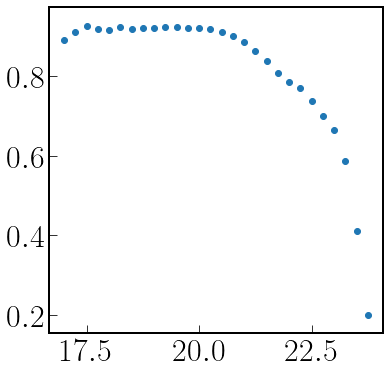

In [29]:
plt.scatter(np.arange(17,24,0.25),ll)

In [21]:
len(h[h.i_psfflux_mag<17.5]),len(hg[hg.i_psfflux_mag<17.5]),len(hs[hs.i_psfflux_mag<17.5])

(1261, 135, 532)

In [23]:
h[(h.i_psfflux_mag<17.5)&(h.i_extendedness_value!=0)&(h.i_extendedness_value!=1)]

,# object_id,parent_id,nchild,isprimary,i_extendedness_value,ra,dec,r_extendedness_value,i_sdsscentroid_ra,i_sdsscentroid_dec,...,i_psfflux_mag,z_psfflux_mag,g_psfflux_magsigma,r_psfflux_magsigma,i_psfflux_magsigma,z_psfflux_magsigma,a_g,a_r,a_i,a_z
10061,40580921186863192,40580921186846786,0,True,NaN,2.027304,-1.148008,0.0,2.027303,-1.148017,...,17.320839,17.244295,NaN,0.000678,0.000613,0.000943,0.103047,0.072387,0.051937,0.040169
17525,40580934071766262,40580934071746766,0,True,NaN,1.992339,-0.650130,NaN,1.992340,-0.650125,...,17.320263,17.403555,0.000566,0.000785,0.000629,0.001015,0.114144,0.080182,0.057530,0.044495
17883,40580934071767706,40580934071748035,0,True,NaN,2.077075,-0.624008,NaN,2.077074,-0.624015,...,17.274239,16.877396,0.000536,0.000645,0.000640,0.000929,0.113535,0.079755,0.057223,0.044258
19092,40580934071773114,40580934071752488,0,True,NaN,2.006971,-0.521880,NaN,2.006970,-0.521877,...,17.361519,17.365158,0.000326,0.000590,0.000629,0.000891,0.113706,0.079875,0.057309,0.044324
37998,40581071510726629,40581071510706620,0,True,NaN,1.898527,-0.505842,NaN,1.898524,-0.505845,...,17.437927,17.230694,0.000739,0.000633,0.000849,0.000905,0.108085,0.075927,0.054476,0.042133
41036,40581075805695599,40581075805675662,0,True,NaN,1.861265,-0.289419,1.0,1.861266,-0.289413,...,17.480066,16.492989,0.000954,0.000614,0.000776,0.000749,0.134203,0.094274,0.067640,0.052314
42497,40581080100659005,40581080100637983,0,True,NaN,1.901059,-0.212239,1.0,1.901058,-0.212234,...,17.265503,16.268730,0.001095,0.000671,0.000569,0.000577,0.185742,0.130478,0.093616,0.072405
59058,40581213244641719,40581213244621486,0,True,NaN,1.605512,-0.450289,NaN,1.605514,-0.450290,...,17.357925,17.162804,0.000818,0.000587,0.000685,0.000551,0.113151,0.079485,0.057029,0.044108
91371,40581479532616210,40581479532594459,0,True,NaN,1.256281,-0.814981,NaN,1.256277,-0.814981,...,17.395609,16.864998,0.000815,0.001030,0.000662,0.000512,0.112748,0.079202,0.056826,0.043951
112331,40581612676606201,40581612676587818,0,True,NaN,1.052187,-0.847265,NaN,1.052188,-0.847263,...,17.423954,17.025074,0.000395,0.000779,0.000796,0.000416,0.114091,0.080146,0.057503,0.044474


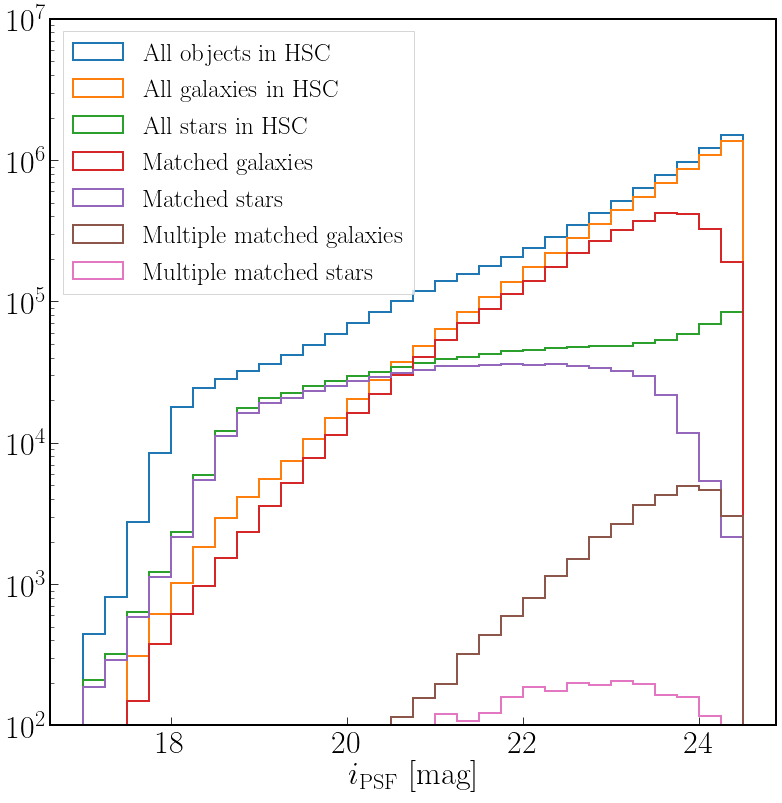

In [17]:
bins=np.arange(17,24.6,0.25)
plt.figure(figsize=(13,13))
plt.hist(h.i_psfflux_mag,bins=bins,histtype='step',label='All objects in HSC',linewidth=2.0)
#plt.hist(s.psfMag_r,bins=bins,color='red',histtype='step',label='All objects in S82')
plt.hist(hg.i_psfflux_mag,bins=bins,histtype='step',label='All galaxies in HSC',linewidth=2.0)
plt.hist(hs.i_psfflux_mag,bins=bins,histtype='step',label='All stars in HSC',linewidth=2.0)
plt.hist(mg.i_psfflux_mag,bins=bins,histtype='step',label='Matched galaxies',linewidth=2.0)
plt.hist(ms.i_psfflux_mag,bins=bins,histtype='step',label='Matched stars',linewidth=2.0)
plt.hist(ga.i_psfflux_mag,bins=bins,histtype='step',label='Multiple matched galaxies',linewidth=2.0)
plt.hist(sa.i_psfflux_mag,bins=bins,histtype='step',label='Multiple matched stars',linewidth=2.0)

plt.xlabel('$i_{\mathrm{PSF}}$ [mag]',fontsize=32)
plt.legend(loc=2)
plt.ylim([100,1e7])
plt.yscale('log')
plt.savefig('../Documents/final/hist.pdf')

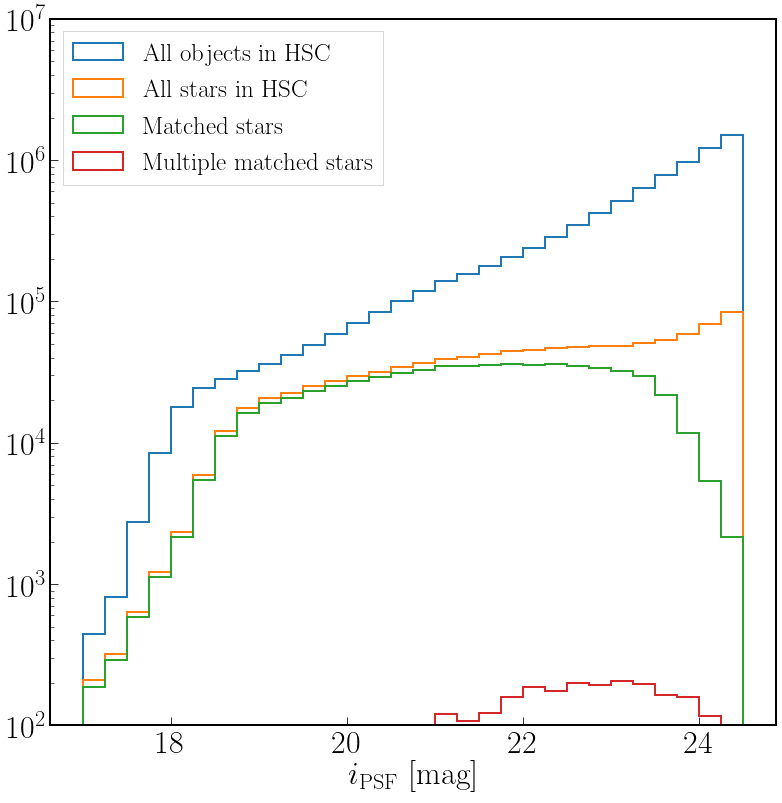

In [22]:
bins=np.arange(17,24.6,0.25)
plt.figure(figsize=(13,13))
plt.hist(h.i_psfflux_mag,bins=bins,histtype='step',label='All objects in HSC',linewidth=2.0)
#plt.hist(s.psfMag_r,bins=bins,color='red',histtype='step',label='All objects in S82')
#plt.hist(hg.i_psfflux_mag,bins=bins,histtype='step',label='All galaxies in HSC',linewidth=2.0)
plt.hist(hs.i_psfflux_mag,bins=bins,histtype='step',label='All stars in HSC',linewidth=2.0)
#plt.hist(mg.i_psfflux_mag,bins=bins,histtype='step',label='Matched galaxies',linewidth=2.0)
plt.hist(ms.i_psfflux_mag,bins=bins,histtype='step',label='Matched stars',linewidth=2.0)
#plt.hist(ga.i_psfflux_mag,bins=bins,histtype='step',label='Multiple matched galaxies',linewidth=2.0)
plt.hist(sa.i_psfflux_mag,bins=bins,histtype='step',label='Multiple matched stars',linewidth=2.0)

plt.xlabel('$i_{\mathrm{PSF}}$ [mag]',fontsize=32)
plt.legend(loc=2)
plt.ylim([100,1e7])
plt.yscale('log')
plt.savefig('../Documents/final/ppt/hist3.png')

In [8]:
h=pd.read_csv('281956.csv')

In [9]:
s=pd.read_csv('S82ol.csv')

In [10]:
hcut1=pd.read_csv('HSC_cut1.csv')
hcut2=pd.read_csv('HSC_cut2.csv')
scut1=pd.read_csv('S82_cut1.csv')
scut2=pd.read_csv('S82_cut2.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
hcut4=pd.read_csv('HSC_cut4.csv')
scut4=pd.read_csv('S82_cut4.csv')

In [12]:
hcut5=pd.read_csv('HSC_cut5.csv')
hcut6=pd.read_csv('HSC_cut6.csv')
scut5=pd.read_csv('S82_cut5.csv')
scut6=pd.read_csv('S82_cut6.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
mcut5=pd.read_csv('matched_cut5.csv')
mcut6=pd.read_csv('matched_cut6.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
mcut1=pd.read_csv('matched_cut1.csv')
mcut2=pd.read_csv('matched_cut2.csv')

In [15]:
mcut4=pd.read_csv('matched_cut4.csv')

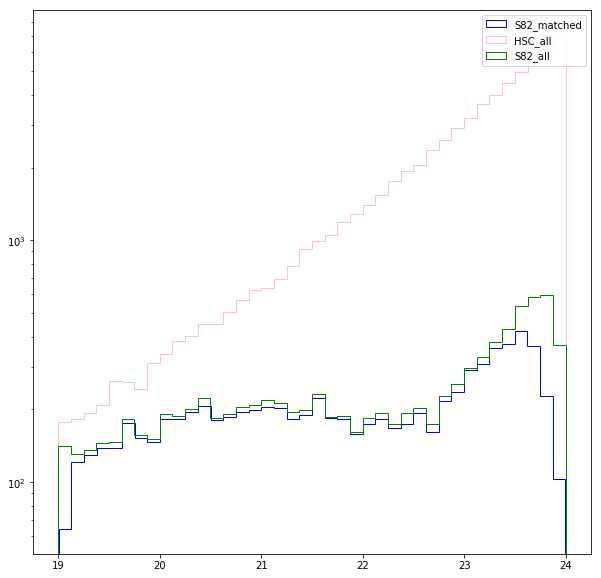

In [46]:
plt.figure(figsize=(10,10))
plt.hist(mcut1.psfMag_i,bins=40,color='blue',histtype='step',label='S82_matched')
plt.hist(hcut1.i_psfflux_mag,bins=40,color='pink',histtype='step',label='HSC_all')
plt.hist(scut1.psfMag_i,bins=40,color='green',histtype='step',label='S82_all')
plt.legend()
plt.yscale('log')
plt.savefig('mag_hist_cut1.png')

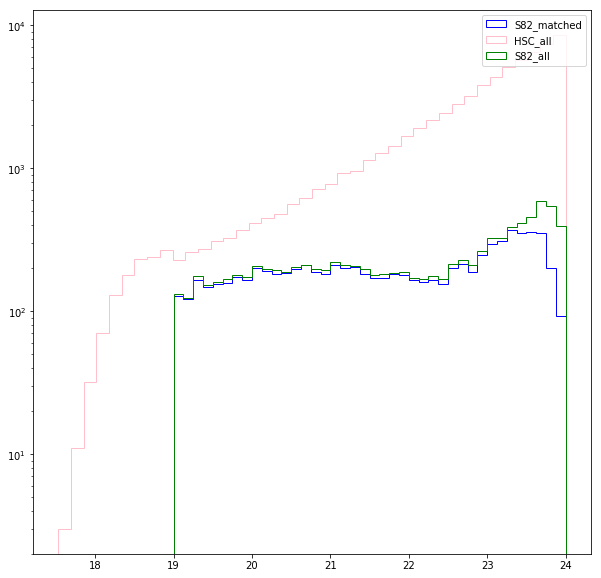

In [47]:
plt.figure(figsize=(10,10))
plt.hist(mcut2.psfMag_i,bins=40,color='blue',histtype='step',label='S82_matched')
plt.hist(hcut2.i_psfflux_mag,bins=40,color='pink',histtype='step',label='HSC_all')
plt.hist(scut2.psfMag_i,bins=40,color='green',histtype='step',label='S82_all')
plt.legend()
plt.yscale('log')
plt.savefig('mag_hist_cut2.png')

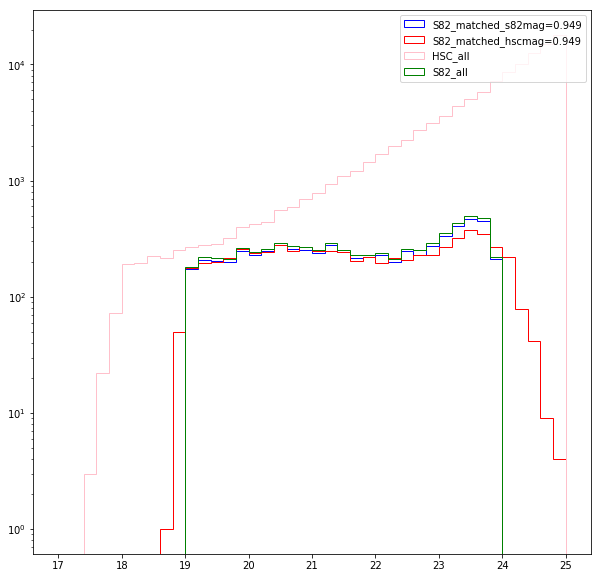

In [23]:
plt.figure(figsize=(10,10))
plt.hist(mcut4.psfMag_i,bins=bins,color='blue',histtype='step',label='S82_matched_s82mag=%.3f'%(len(mcut4)/len(scut4)))
plt.hist(mcut4.i_psfflux_mag,bins=bins,color='red',histtype='step',label='S82_matched_hscmag=%.3f'%(len(mcut4)/len(scut4)))
plt.hist(hcut4.i_psfflux_mag,bins=bins,color='pink',histtype='step',label='HSC_all')
plt.hist(scut4.psfMag_i,bins=bins,color='green',histtype='step',label='S82_all')
plt.legend()
plt.yscale('log')
plt.savefig('mag_hist_cut4_star.png')

In [18]:
scut5=scut5[scut5.psfMag_i>19]
mcut5=mcut5[mcut5.psfMag_i>19]

In [16]:
bins=list(np.linspace(17,25,41))

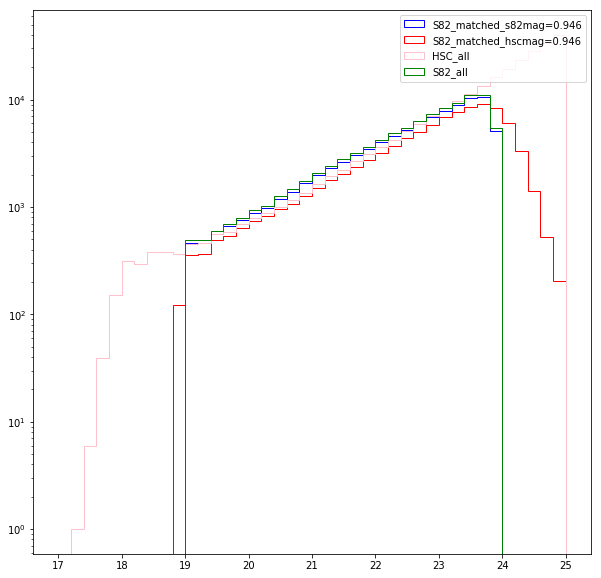

In [19]:
plt.figure(figsize=(10,10))
plt.hist(mcut5.psfMag_i,bins=bins,color='blue',histtype='step',label='S82_matched_s82mag=%.3f'%(len(mcut5)/len(scut5)))
plt.hist(mcut5.i_psfflux_mag,bins=bins,color='red',histtype='step',label='S82_matched_hscmag=%.3f'%(len(mcut5)/len(scut5)))
plt.hist(hcut5.i_psfflux_mag,bins=bins,color='pink',histtype='step',label='HSC_all')
plt.hist(scut5.psfMag_i,bins=bins,color='green',histtype='step',label='S82_all')
plt.legend()
plt.yscale('log')
plt.savefig('mag_hist_cut5_all.png')

In [58]:
scut6=scut6[scut6.psfMag_i>19]
mcut6=mcut6[mcut6.psfMag_i>19]

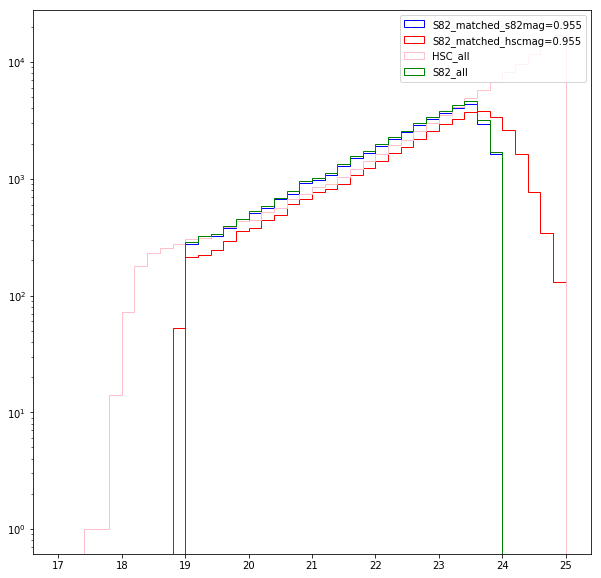

In [59]:
plt.figure(figsize=(10,10))
plt.hist(mcut6.psfMag_i,bins=bins,color='blue',histtype='step',label='S82_matched_s82mag=%.3f'%(len(mcut6)/len(scut6)))
plt.hist(mcut6.i_psfflux_mag,bins=bins,color='red',histtype='step',label='S82_matched_hscmag=%.3f'%(len(mcut6)/len(scut6)))
plt.hist(hcut6.i_psfflux_mag,bins=bins,color='pink',histtype='step',label='HSC_all')
plt.hist(scut6.psfMag_i,bins=bins,color='green',histtype='step',label='S82_all')
plt.legend()
plt.yscale('log')

In [ ]:
#after Oct.4th 

In [2]:
h=pd.read_csv('/Users/tianqiu/Downloads/catalog/318355.csv')
m=pd.read_csv('/Users/tianqiu/Downloads/catalog/m_s82_stars_hsc_all_i<24.2_ira_c_dist.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
msg=m[m.r_extendedness_value==1]

In [3]:
s=h[h.r_extendedness_value==0]

In [32]:
s1=s[(s.ra>330)&(s.ra<340)&(s.dec>-1)&(s.dec<1)]
s2=s[(s.ra>340)&(s.ra<350)&(s.dec>-1)&(s.dec<1)]
s3=s[(s.ra>350)&(s.ra<360)&(s.dec>-1)&(s.dec<1)]

In [33]:
m1=msg[(msg.ra_1>330)&(msg.ra_1<340)&(msg.dec_1>-1)&(msg.dec_1<1)]
m2=msg[(msg.ra_1>340)&(msg.ra_1<350)&(msg.dec_1>-1)&(msg.dec_1<1)]
m3=msg[(msg.ra_1>350)&(msg.ra_1<360)&(msg.dec_1>-1)&(msg.dec_1<1)]

In [20]:
tplt = '{0:^10}\t{1:^10}\t{2:^10}\t{3:^10}'

In [44]:
print(tplt.format('i_mag','starlike galaxy','star in HSC','ratio'))
t1=[]
t2=[]
for i in range(12):
    t1.append(len(s1[(s1.i_psfflux_mag>i/2+18)&(s1.i_psfflux_mag<18.5+i/2)]))
    t2.append(len(m1[(m1.i_psfflux_mag>i/2+18)&(m1.i_psfflux_mag<18.5+i/2)]))
    print(tplt.format(str(i/2+18)+'~'+str(i/2+18.5),t2[i],t1[i],t2[i]/t1[i]))
t1=np.array(t1)
t2=np.array(t2)

  i_mag   	starlike galaxy	star in HSC	  ratio   
18.0~18.5 	   735    	  20460   	0.03592375366568915
18.5~19.0 	   932    	  31620   	0.029475015812776725
19.0~19.5 	   840    	  34023   	0.024689180848249715
19.5~20.0 	   746    	  38493   	0.019380147039721508
20.0~20.5 	   730    	  42937   	0.01700165358548571
20.5~21.0 	   851    	  48043   	0.017713298503424017
21.0~21.5 	   828    	  52476   	0.015778641664761034
21.5~22.0 	   1034   	  56188   	0.01840250587314017
22.0~22.5 	   2019   	  57974   	0.034825956463242144
22.5~23.0 	   4919   	  58246   	0.08445215122068468
23.0~23.5 	  10572   	  57373   	0.18426786118906105
23.5~24.0 	  15378   	  53189   	0.28911993081276205


In [60]:
tt=np.array([(1-0.97)*t1[2],(1-0.96)*t1[3],(1-0.96)*t1[4],(1-0.92)*t1[5],(1-0.94)*t1[6],(1-0.91)*t1[7],(1-0.89)*t1[8],(1-0.82)*t1[9],(1-0.74)*t1[10],(1-0.65)*t1[11]])

In [65]:
tt/t2[2:]

array([1.21510714, 2.06396783, 2.35271233, 4.51638073, 3.8026087 ,
       4.8906383 , 3.15856365, 2.13138443, 1.41098941, 1.2105703 ])

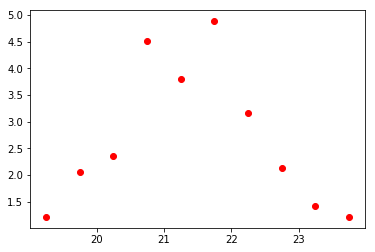

In [64]:
x=np.arange(19,24,0.5)
plt.scatter(x+0.25,tt/t2[2:],c='red')

In [35]:
print(tplt.format('i_mag','starlike galaxy','star in HSC','ratio'))
for i in range(12):
    t1=s2[(s2.i_psfflux_mag>i/2+18)&(s2.i_psfflux_mag<18.5+i/2)]
    t2=m2[(m2.i_psfflux_mag>i/2+18)&(m2.i_psfflux_mag<18.5+i/2)]
    print(tplt.format(str(i/2+18)+'~'+str(i/2+18.5),len(t2),len(t1),len(t2)/len(t1)))

  i_mag   	starlike galaxy	star in HSC	  ratio   
18.0~18.5 	   486    	  16746   	0.029021855965603725
18.5~19.0 	   577    	  23420   	0.024637062339880444
19.0~19.5 	   488    	  25762   	0.01894262867789768
19.5~20.0 	   438    	  28587   	0.015321649700913003
20.0~20.5 	   426    	  31240   	0.013636363636363636
20.5~21.0 	   383    	  34360   	0.011146682188591385
21.0~21.5 	   501    	  37543   	0.013344698079535465
21.5~22.0 	   770    	  40077   	0.01921301494622851
22.0~22.5 	   1775   	  40912   	0.04338580367618303
22.5~23.0 	   4951   	  40904   	0.12103950713866614
23.0~23.5 	  11439   	  39760   	0.28770120724346077
23.5~24.0 	  17500   	  39584   	0.44209781729991915


In [36]:
print(tplt.format('i_mag','starlike galaxy','star in HSC','ratio'))
for i in range(12):
    t1=s3[(s3.i_psfflux_mag>i/2+18)&(s3.i_psfflux_mag<18.5+i/2)]
    t2=m3[(m3.i_psfflux_mag>i/2+18)&(m3.i_psfflux_mag<18.5+i/2)]
    print(tplt.format(str(i/2+18)+'~'+str(i/2+18.5),len(t2),len(t1),len(t2)/len(t1)))

  i_mag   	starlike galaxy	star in HSC	  ratio   
18.0~18.5 	   542    	  13799   	0.03927820856583811
18.5~19.0 	   603    	  18044   	0.03341831079583241
19.0~19.5 	   481    	  18582   	0.025885265310515552
19.5~20.0 	   524    	  21069   	0.024870663059471262
20.0~20.5 	   613    	  23537   	0.026044100777499257
20.5~21.0 	   693    	  25372   	0.027313574018603185
21.0~21.5 	   732    	  27639   	0.026484315640942148
21.5~22.0 	   959    	  28791   	0.03330902017991733
22.0~22.5 	   1924   	  29578   	0.06504834674420178
22.5~23.0 	   4978   	  29509   	0.16869429665525773
23.0~23.5 	  11142   	  28326   	0.3933488667655158
23.5~24.0 	  18389   	  27783   	0.6618795666414714
